<a href="https://colab.research.google.com/github/SreeeelakshmiChandran/AI-Product/blob/main/Market_Segmentation_OF_AI_Diagnostic_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


In [75]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Ai_in_Healthcare_Dataset.csv to Ai_in_Healthcare_Dataset (1).csv


In [76]:
data=pd.read_csv("Ai_in_Healthcare_Dataset.csv")
data

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,NaN,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,Female,121.637508,69.839584,98.196956,Diabetes,Insulin,6,Uninsured,Dr. Brown,Healthcare Clinic,91.223300,Normal,Appendectomy,9,Peanuts,Cancer,1,0.762071
4996,4997,77,Male,90.043729,80.782438,98.578032,Cancer,Antibiotics,10,Private,Dr. Johnson,Regional Hospital,112.273381,Normal,Gallbladder Removal,9,Penicillin,Hypertension,2,0.940696
4997,4998,26,Female,121.506747,72.340389,98.142521,Diabetes,Insulin,23,Medicaid,Dr. Lee,City Medical Center,82.035720,Abnormal,Cataract Surgery,2,Latex,Alzheimer's,1,0.935514
4998,4999,81,Female,130.388398,86.268489,96.224625,Heart Disease,Chemotherapy,4,Medicare,Dr. Brown,Regional Hospital,148.847731,Abnormal,Appendectomy,4,Shellfish,Heart Disease,1,0.818013


In [77]:
data.shape

(5000, 20)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Blood_Pressure           5000 non-null   float64
 4   Heart_Rate               5000 non-null   float64
 5   Temperature              5000 non-null   float64
 6   Diagnosis                5000 non-null   object 
 7   Medication               5000 non-null   object 
 8   Treatment_Duration       5000 non-null   int64  
 9   Insurance_Type           5000 non-null   object 
 10  Doctor_Name              5000 non-null   object 
 11  Hospital_Name            5000 non-null   object 
 12  Lab_Test_Results         5000 non-null   float64
 13  X-ray_Results            5000 non-null   object 
 14  Surgery_Type            

In [79]:
data.describe()

,Patient_ID,Age,Blood_Pressure,Heart_Rate,Temperature,Treatment_Duration,Lab_Test_Results,Recovery_Time,Patient_Satisfaction,AI_Diagnosis_Confidence
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,53.433200,119.863621,74.755327,98.603710,14.965400,100.201480,4.944200,2.993600,0.843927
std,1443.520003,20.931669,15.055656,9.974505,1.002509,8.403495,19.813474,2.570994,1.417731,0.084355
min,1.000000,18.000000,61.940115,36.760595,94.930131,1.000000,24.567602,1.000000,1.000000,0.700017
25%,1250.750000,35.000000,109.896065,67.935319,97.929791,8.000000,86.769592,3.000000,2.000000,0.768968
50%,2500.500000,53.000000,119.772157,75.000152,98.618301,15.000000,100.473921,5.000000,3.000000,0.843321
75%,3750.250000,72.000000,129.893989,81.556148,99.265743,22.000000,113.730522,7.000000,4.000000,0.917418
max,5000.000000,89.000000,168.092063,117.198456,102.497318,29.000000,168.340588,9.000000,5.000000,0.989988


In [80]:
data.isnull().sum()

Patient_ID                   0
Age                          0
Gender                       0
Blood_Pressure               0
Heart_Rate                   0
Temperature                  0
Diagnosis                    0
Medication                   0
Treatment_Duration           0
Insurance_Type               0
Doctor_Name                  0
Hospital_Name                0
Lab_Test_Results             0
X-ray_Results                0
Surgery_Type                 0
Recovery_Time                0
Allergies                  964
Family_History               0
Patient_Satisfaction         0
AI_Diagnosis_Confidence      0
dtype: int64

In [81]:
data['Allergies'].fillna('Missing', inplace=True)

In [82]:
data.to_csv(r"C:\Users\sreel\OneDrive\Desktop\Ai_in_Healthcare_Dataset.csv", index=False)

In [83]:
print(data['Allergies'].head(10))

0         Latex
1     Shellfish
2       Missing
3         Latex
4     Shellfish
5         Latex
6       Missing
7    Penicillin
8         Latex
9         Latex
Name: Allergies, dtype: object


In [84]:
data

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,Missing,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,Female,121.637508,69.839584,98.196956,Diabetes,Insulin,6,Uninsured,Dr. Brown,Healthcare Clinic,91.223300,Normal,Appendectomy,9,Peanuts,Cancer,1,0.762071
4996,4997,77,Male,90.043729,80.782438,98.578032,Cancer,Antibiotics,10,Private,Dr. Johnson,Regional Hospital,112.273381,Normal,Gallbladder Removal,9,Penicillin,Hypertension,2,0.940696
4997,4998,26,Female,121.506747,72.340389,98.142521,Diabetes,Insulin,23,Medicaid,Dr. Lee,City Medical Center,82.035720,Abnormal,Cataract Surgery,2,Latex,Alzheimer's,1,0.935514
4998,4999,81,Female,130.388398,86.268489,96.224625,Heart Disease,Chemotherapy,4,Medicare,Dr. Brown,Regional Hospital,148.847731,Abnormal,Appendectomy,4,Shellfish,Heart Disease,1,0.818013


In [85]:
data.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Blood_Pressure             0
Heart_Rate                 0
Temperature                0
Diagnosis                  0
Medication                 0
Treatment_Duration         0
Insurance_Type             0
Doctor_Name                0
Hospital_Name              0
Lab_Test_Results           0
X-ray_Results              0
Surgery_Type               0
Recovery_Time              0
Allergies                  0
Family_History             0
Patient_Satisfaction       0
AI_Diagnosis_Confidence    0
dtype: int64

In [86]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [87]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Blood_Pressure', 'Heart_Rate',
       'Temperature', 'Diagnosis', 'Medication', 'Treatment_Duration',
       'Insurance_Type', 'Doctor_Name', 'Hospital_Name', 'Lab_Test_Results',
       'X-ray_Results', 'Surgery_Type', 'Recovery_Time', 'Allergies',
       'Family_History', 'Patient_Satisfaction', 'AI_Diagnosis_Confidence'],
      dtype='object')

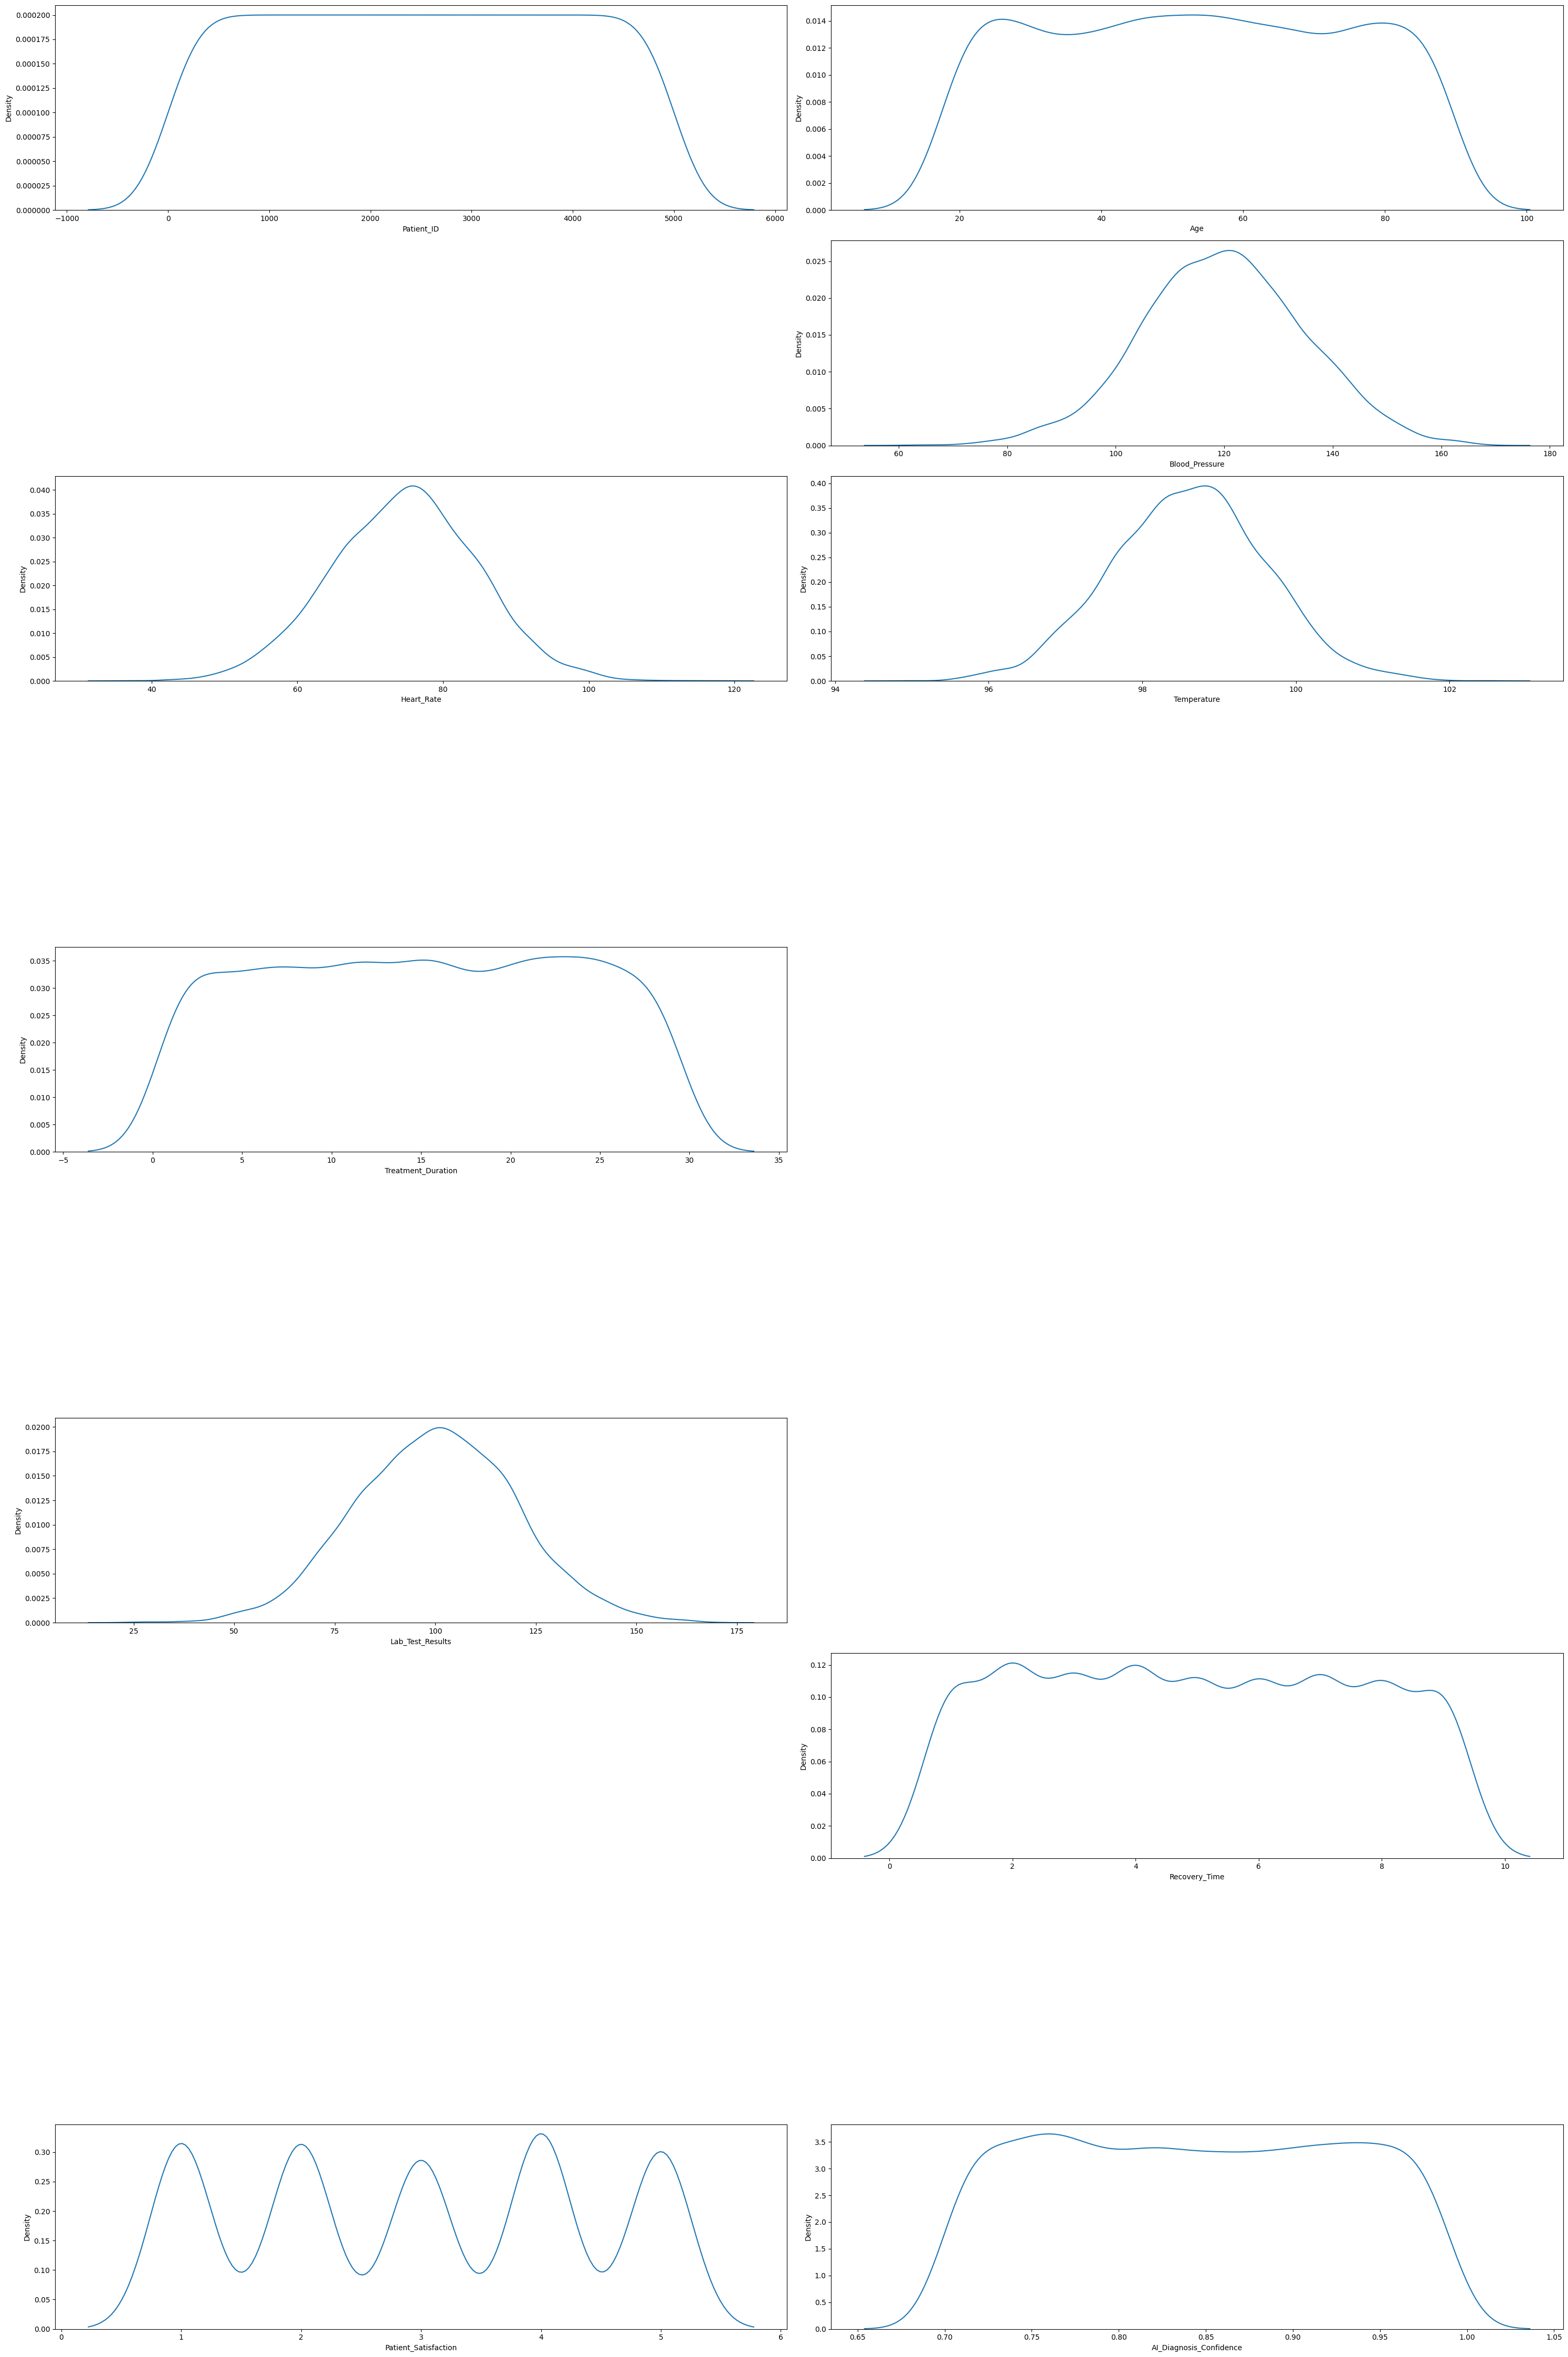

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,45))
# Adjust the subplot grid to accommodate all columns
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(10, 2, i+1) # Increased number of rows to 10
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)

plt.tight_layout() # Adjusts subplot params so that the subplots fit in to the figure area.
plt.show()

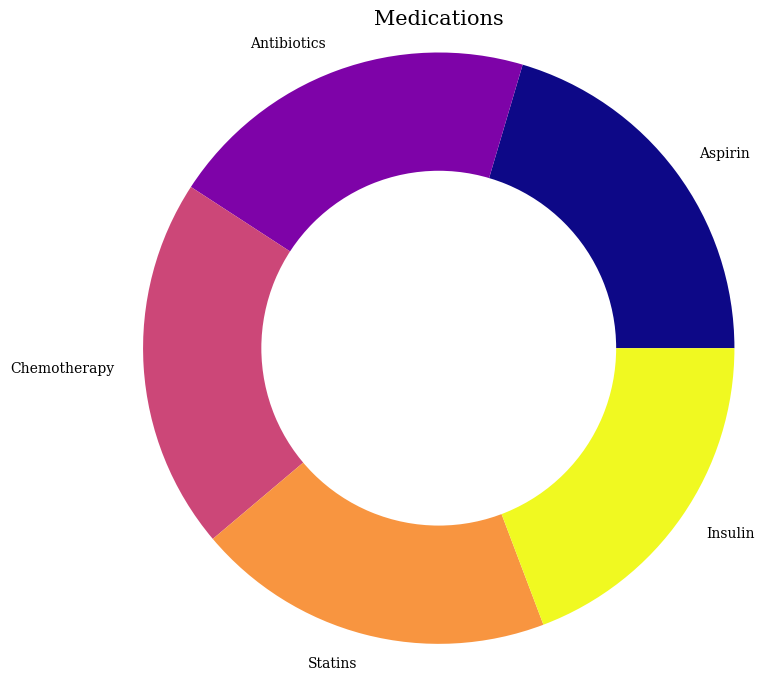

In [89]:
x = data['Medication'].value_counts().plot.pie(radius=2, cmap='plasma', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Medications', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

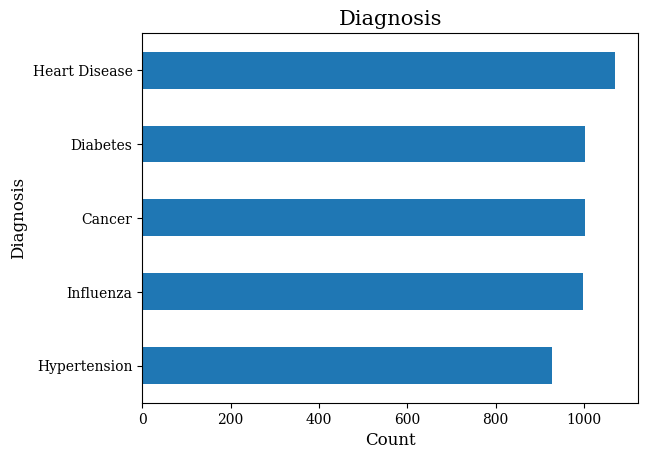

In [90]:
data['Diagnosis'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Diagnosis', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Diagnosis', family='serif', size=15)
plt.show()

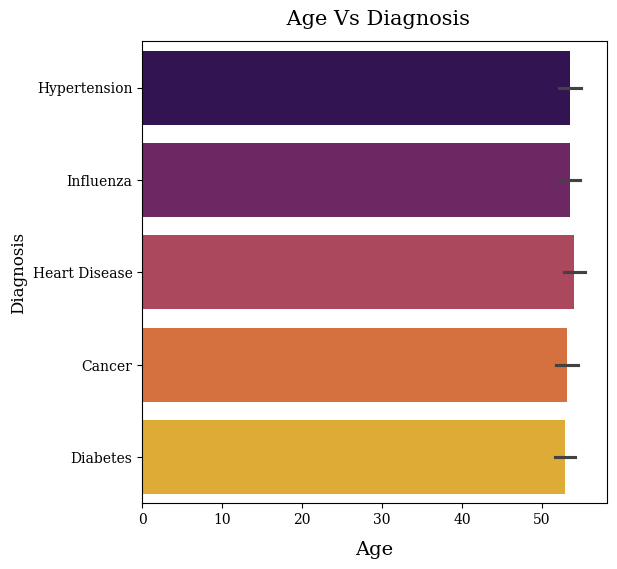

In [91]:
plt.figure(figsize=(6, 6))
sns.barplot(data=data, y=data['Diagnosis'].sort_values(ascending=True), x='Age', palette='inferno')
plt.ylabel('Diagnosis', fontsize=12, family='serif')
plt.xlabel('Age', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label=' Age Vs Diagnosis', weight=200, family='serif', size=15, pad=12)
plt.show()

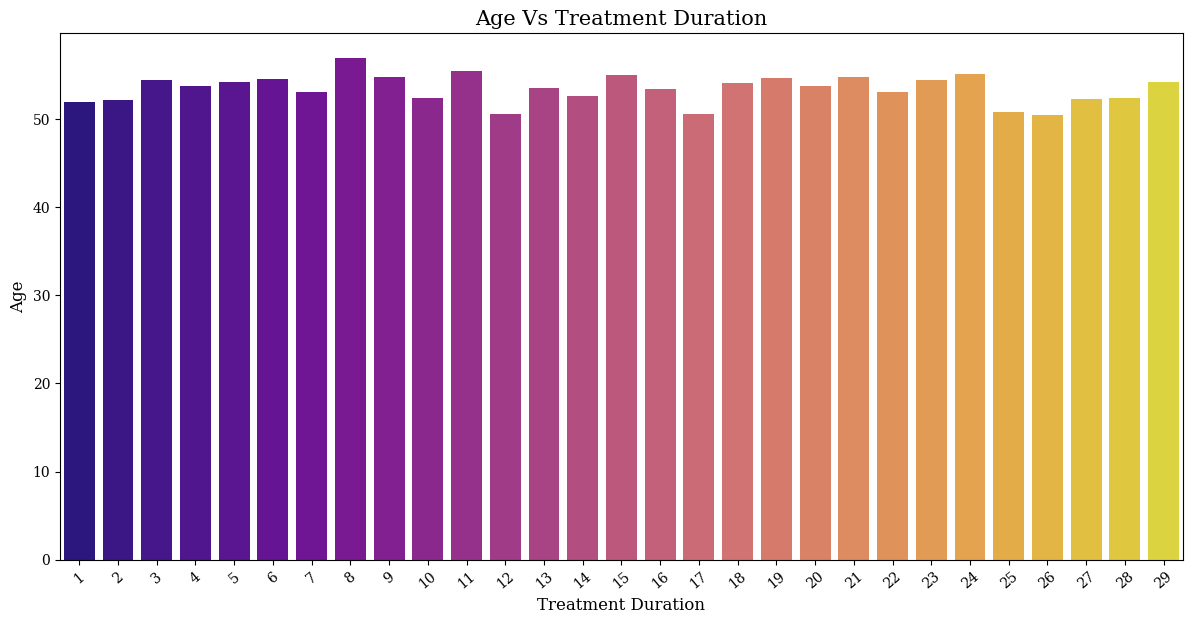

In [92]:

sns.catplot(kind='bar', data=data, x='Treatment_Duration', y='Age', palette='plasma', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Treatment Duration',family='serif', size=12)
plt.ylabel('Age', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Age Vs Treatment Duration', family='serif', size=15);

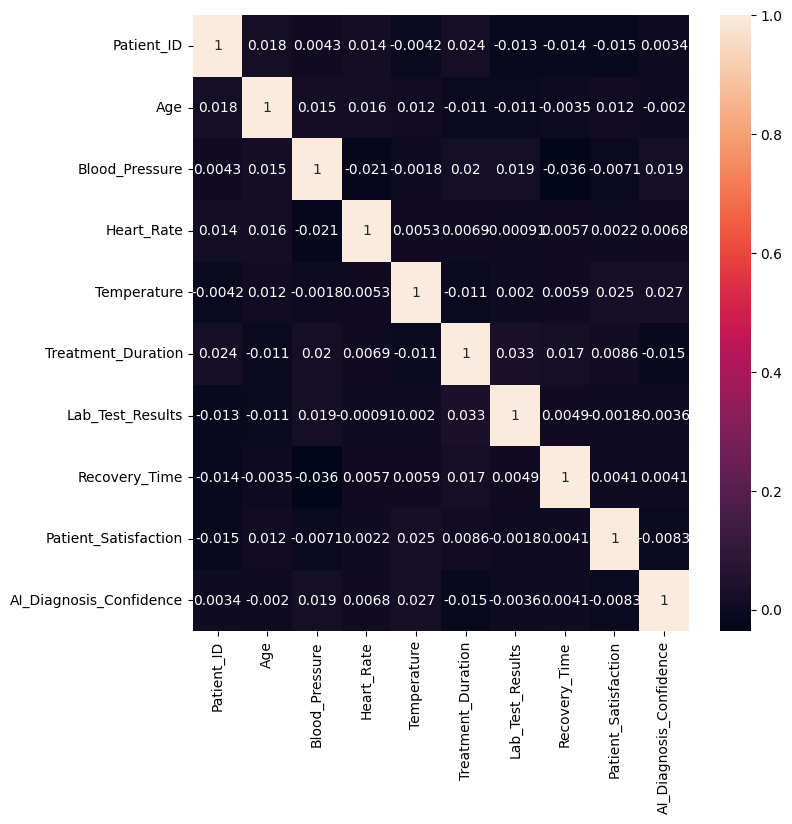

In [93]:
numerical_df = data.select_dtypes(include=['float', 'int'] )
plt.figure(figsize=(8,8))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [94]:
numerical_dif = data.select_dtypes(include=['float', 'int'] )
scalar = StandardScaler()
scaled_df = scalar.fit_transform(numerical_df)

In [95]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df.head()


,PCA1,PCA2
0,0.509181,0.950728
1,-0.880015,-0.304782
2,0.988920,1.015511
3,0.901591,0.378278
4,0.702427,0.170814


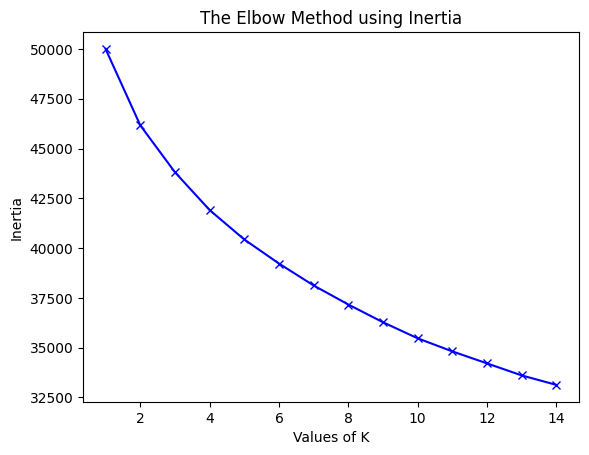

In [96]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [97]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

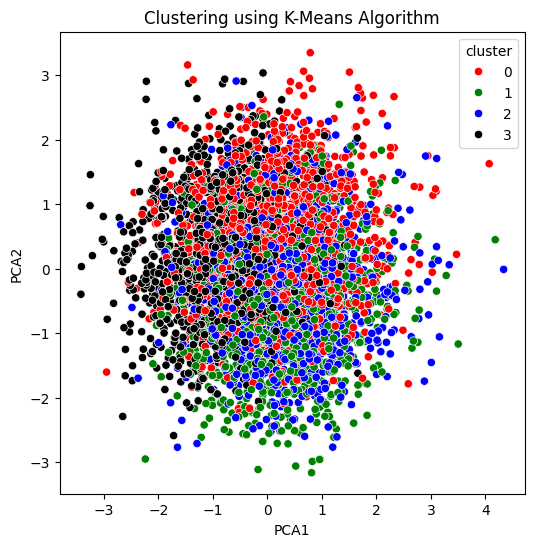

In [98]:
plt.figure(figsize=(6,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [107]:
import pandas as pd

# Verify the number of features
num_features = kmeans_model.cluster_centers_.shape[1]
data_columns = data.columns[:num_features]  # Adjust column selection based on the number of features

# Create DataFrame with cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=data_columns)

# Inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=data_columns)

# Display the cluster centers
print(cluster_centers.head())

    Patient_ID        Age      Gender  Blood_Pressure  Heart_Rate  \
0  2514.798913  53.407609  118.065868       76.205191   98.595148   
1  2330.587580  54.990446  120.519784       74.176932   98.622113   
2  2465.238683  54.303704  119.946877       74.270900   98.692784   
3  2692.148268  51.031426  120.983855       74.310216   98.506763   

   Temperature   Diagnosis  Medication  Treatment_Duration  Insurance_Type  
0    15.187112   98.525069    4.995342            4.123447        0.764307  
1     6.843153   98.691936    4.651274            1.867038        0.849272  
2    15.191770  101.458958    5.219753            4.193416        0.924421  
3    22.734085  102.238037    4.917808            1.786463        0.842347  


In [109]:
cluster_df = pd.concat([data,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,...,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence,Cluster
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,...,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404,2
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,...,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706,0
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,...,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,Missing,Hypertension,2,0.802673,1
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,...,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811,0
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,...,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850,1


<Axes: xlabel='Cluster', ylabel='count'>

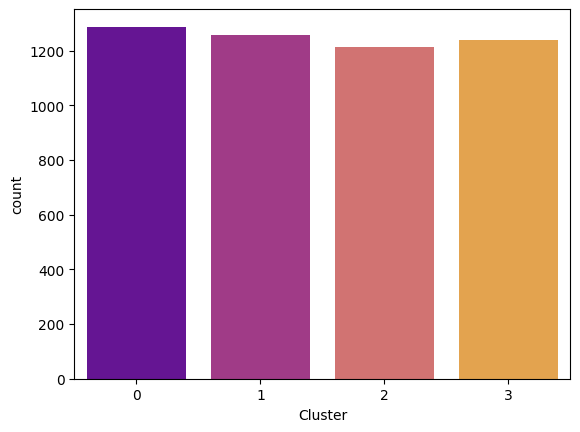

In [111]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df, palette ='plasma')